## FEATURE ENGINEERING for CHECKIN, TIPS, REVIEWS, USER 

In [ ]:
#### INSTALLATION OF LIBRARIES
!sudo apt update
!sudo apt install openjdk-17-jdk -y
#!curl -JLO 'https://apache.osuosl.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz'
!tar xvf spark-3.3.1-bin-hadoop3.tgz
!mv spark-3.3.1-bin-hadoop3 /opt/spark
!pip install pyspark missingno findspark plotly wandb koalas

In [ ]:
#### LIBRARIES
import os
os.environ["JAVA_HOME"] = "/usr"
os.environ["SPARK_HOME"] = "/opt/spark"
#### BASIC
import pandas as pd
import matplotlib.pyplot as plt

#### SPARK
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pyspark.pandas as ps
spark = SparkSession.builder.master("local[*]").getOrCreate()

#### SETTINGS
%matplotlib inline
spark.sparkContext.setLogLevel("OFF")
pd.options.plotting.backend = 'plotly'
ps.options.plotting.backend = 'matplotlib'

## CHECKIN

In [19]:
checkin = pd.read_json("./data/checkin.json", lines=True)

In [20]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [45]:
checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [21]:
checkin['number_visits'] = checkin['date'].str.split(',').str.len()

In [22]:
checkin.head()

,business_id,date,number_visits
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",11
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...",10
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22",2
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...",10
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...",26


In [23]:
checkin.sort_values(by='number_visits', ascending=False).head()

,business_id,date,number_visits
878,-QI8Qi8XWH3D8y8ethnajA,"2010-01-17 16:30:46, 2010-01-18 20:17:55, 2010...",52144
33681,FEXhWNCMkv22qG04E83Qjg,"2010-01-16 07:39:02, 2010-01-17 14:04:18, 2010...",40109
32401,Eb1XmmLWyt_way5NNZ7-Pw,"2010-01-21 19:43:12, 2010-02-03 10:17:21, 2010...",37562
83440,c_4c5rJECZSfNgFj7frwHQ,"2010-02-06 18:03:00, 2010-02-08 00:06:52, 2010...",37518
11840,4i4kmYm9wgSNyF1b6gKphg,"2010-01-21 19:31:34, 2010-01-26 22:12:24, 2010...",31168


In [49]:
checkin['business_id'].unique().shape

(131930,)

In [24]:
checkin.drop(['date'], axis=1).to_csv('./data/n_checkins.csv', index=False)

# TIPS

In [3]:
tips = pd.read_json("./data/tip.json", lines=True)

In [33]:
tips['date'].describe()

/tmp/ipykernel_3009/1128088686.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tips['date'].describe()


count                  908915
unique                 906694
top       2014-02-20 04:09:37
freq                        6
first     2009-04-16 13:11:49
last      2022-01-19 20:38:55
Name: date, dtype: object

In [4]:
tips['business_id'].unique().shape

(106193,)

In [5]:
import pandas as pd
import numpy as np

In [6]:
hola = pd.DataFrame(tips['business_id'].value_counts())
hola.rename(columns={'business_id': 'number_tips'}, inplace=True)
hola['business_id'] = hola.index
hola.reset_index(drop=True, inplace=True)
hola

,number_tips,business_id
0,2571,FEXhWNCMkv22qG04E83Qjg
1,1011,-QI8Qi8XWH3D8y8ethnajA
2,932,_ab50qdWOk0DdB6XOrBitw
3,827,ytynqOUb3hjKeJfRj5Tshw
4,826,Eb1XmmLWyt_way5NNZ7-Pw
...,...,...
106188,1,JnQd5ZdfFhIDDq1CTcSaaA
106189,1,xRaddmd73rkdLxUx7Grtcg
106190,1,JjRSWWCp8Yd2gnqIMY0DiA
106191,1,4D2NVjVRANfHaROxuqlkDA


In [7]:
hola.to_csv('./data/top_tips.csv', index=False)

In [ ]:
tips.loc[tips['business_id'] == 'FEXhWNCMkv22qG04E83Qjg',:]

In [53]:
tips['business_id'].value_counts()

FEXhWNCMkv22qG04E83Qjg    2571
-QI8Qi8XWH3D8y8ethnajA    1011
_ab50qdWOk0DdB6XOrBitw     932
ytynqOUb3hjKeJfRj5Tshw     827
Eb1XmmLWyt_way5NNZ7-Pw     826
                          ... 
JnQd5ZdfFhIDDq1CTcSaaA       1
xRaddmd73rkdLxUx7Grtcg       1
JjRSWWCp8Yd2gnqIMY0DiA       1
4D2NVjVRANfHaROxuqlkDA       1
QqDz0hQ7iPpHJAd9JOTudQ       1
Name: business_id, Length: 106193, dtype: int64

In [54]:
tips.loc[tips['business_id']=='FEXhWNCMkv22qG04E83Qjg',:]

,user_id,business_id,text,date,compliment_count
14831,2J4SwmI7UczrgZTmm-mpvA,FEXhWNCMkv22qG04E83Qjg,Get here early!,2014-03-16 15:33:19,0
24078,wwoLHw7FX0CaeOmw1ejDxg,FEXhWNCMkv22qG04E83Qjg,Open 24 hours a day!,2017-07-01 07:43:32,0
26887,u3UHkwDP_9gC53NbTYeBhQ,FEXhWNCMkv22qG04E83Qjg,Always love this place. What can be bad about ...,2015-06-12 04:14:09,0
43285,rRGDy3Z8kkU8dvn79GeIfw,FEXhWNCMkv22qG04E83Qjg,Cash Only.,2017-07-07 22:56:43,0
47737,065Bl8Fg1mvbiwXh4NaSHw,FEXhWNCMkv22qG04E83Qjg,Always come on a week day! Less crowd.. oh I ...,2013-06-02 05:40:36,0
...,...,...,...,...,...
908341,xuMSYj2ddq36SVip-MjtKA,FEXhWNCMkv22qG04E83Qjg,Wow the beignets!!! \n\nPablo H,2018-12-23 17:28:07,0
908399,3H1o6XvdeO53MgsOOz86mg,FEXhWNCMkv22qG04E83Qjg,Love it!,2012-05-28 20:40:27,0
908508,8sZtmuKpMc6giASI6cyc1g,FEXhWNCMkv22qG04E83Qjg,Yummy beignets!! A must in NOLA.,2019-01-22 16:14:14,0
908509,Y2hIHXJe2z4h9PSgkt_3sQ,FEXhWNCMkv22qG04E83Qjg,Get the Hot Chocolate and a Beignets,2013-06-12 00:35:30,0


Looks like compliment count is almost always zero

In [55]:
tips['compliment_count'].value_counts()

0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: compliment_count, dtype: int64

This are some users which have 5 compliments counts

In [56]:
tips.loc[tips['compliment_count'] == 5,:]

,user_id,business_id,text,date,compliment_count
85848,G-l9ihg3sRAiGTuZLDmJTQ,5AOSTPOiZb7pnHJ6ICqqbA,"$8 drink menu, Velvet seats, and Dog friendly.",2014-11-06 01:01:18,5
244605,A4bsa7ykYRVCnb4h2vZALw,3Wy21heeDm8h2tSZfcj6OA,30 minute wait for our drink order is unaccept...,2017-01-15 22:16:30,5
545163,tsMF0FcFcHZ8i28WzWtQXw,pPpaOXOwcuO7z0sDghmOgw,Sumo oranges are in season. (Jan.- Mar.) They ...,2020-01-17 14:15:20,5


But first user have over 355 compliments. Looks like compliment count it's not working

In [57]:
tips.loc[tips['user_id'] == 'A4bsa7ykYRVCnb4h2vZALw',:]


,user_id,business_id,text,date,compliment_count
135913,A4bsa7ykYRVCnb4h2vZALw,E7RtIisUoRMcADSebBgNAA,Blood Orange Margarita yummm!!,2011-02-19 03:32:21,0
136467,A4bsa7ykYRVCnb4h2vZALw,skY6r8WAkYqpV7_TxNm23w,Great food and drinks! Parking can be tough. M...,2012-09-15 03:29:54,1
149063,A4bsa7ykYRVCnb4h2vZALw,ZJrGrghbNx4WTPb5cL2GFw,Try the Bridge Mix! Addicting,2013-03-09 02:07:11,0
151471,A4bsa7ykYRVCnb4h2vZALw,3lty2YUwjp61iUqNgKVEMw,Happy Hour 3-7pm! Great appetizers and they ar...,2013-03-22 23:52:28,0
157244,A4bsa7ykYRVCnb4h2vZALw,qmOn3S_BzihpLP2aMG9QSg,Best Michelada I've tried thus far In SB!!,2013-08-03 01:49:03,0
...,...,...,...,...,...
425095,A4bsa7ykYRVCnb4h2vZALw,SYHDOHRNAH-2xsw3XB5qbg,Check out their Groupon offer,2018-11-25 18:25:22,1
425356,A4bsa7ykYRVCnb4h2vZALw,rIGX4yiwBwI9l2XC5F0dbw,Great selection of books! Especially in the ki...,2013-01-12 23:13:58,0
425640,A4bsa7ykYRVCnb4h2vZALw,8r_n8JdKQ0gePm2neSkL7A,You get alot of good food for your money!,2013-01-20 00:03:10,0
425871,A4bsa7ykYRVCnb4h2vZALw,630njXSiAryjnEjGc6FAhw,Customer service sucks here!,2016-03-31 19:42:13,0


Ranking of users by compliment count

In [58]:
tips['user_id'].value_counts().head()

fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
Name: user_id, dtype: int64

# USERS

In [59]:
users = pd.read_json("./data/user.json", lines=True)

In [60]:
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [61]:
#users['user_id'].unique().sum()

In [ ]:
users.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [ ]:
users.shape

(1987897, 22)

In [ ]:
users.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


Calculating N_Friends

In [ ]:
users['n_friends'] = users['friends'].str.split(',').str.len()

In [ ]:
users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'n_friends'],
      dtype='object')

In [ ]:
users.drop(columns=['friends'], inplace=True)

Calculating interactions sent and received

In [ ]:
users['n_interactions_send'] = users['useful'] + users['funny'] + users['cool']

In [ ]:
users['n_interactions_received'] = users[[ 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos']].sum(axis=1)

Calculating N_years being Elite

In [ ]:
users['n_years_elite'] = users['elite'].str.split(',').str.len()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
users.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,n_friends,n_interactions_send,n_interactions_received,n_years_elite
count,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,...,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00
mean,23.39,42.30,16.97,23.79,1.47,3.63,1.81,0.29,0.18,0.13,...,1.44,3.01,2.83,2.83,1.06,1.23,53.38,83.06,14.87,1.15
std,82.57,641.48,407.80,565.35,18.13,1.18,73.60,12.82,15.16,11.36,...,60.17,119.39,96.66,96.66,32.18,95.16,146.44,1600.32,547.13,0.89
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
50%,5.00,3.00,0.00,0.00,0.00,3.88,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,0.00,1.00
75%,17.00,13.00,2.00,3.00,0.00,4.56,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,46.00,18.00,1.00,1.00
max,17473.00,206296.00,185823.00,199878.00,12497.00,5.00,25784.00,13501.00,14180.00,13654.00,...,59031.00,101097.00,49967.00,49967.00,15934.00,82630.00,14995.00,587933.00,324328.00,17.00


In [ ]:
users.loc[users['n_interactions_send'] == 587933.00,:]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,n_friends,n_interactions_send,n_interactions_received,n_years_elite
17169,Hi10sGSZNxQH3NLyWSZ1oA,Fox,17473,2009-05-26 11:33:58,206296,185823,195814,"2014,2015,2016,2017,2018,2019,20,20,2021",3493,3.77,...,2408,6565,7655,7655,1644,4053,5331,587933,35064,9


In [ ]:
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,n_friends,n_interactions_send,n_interacionts_received,n_years_elite
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,267,3.91,...,232,844,467,467,239,180,14995,14470,2873,1
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,...,1847,7054,3131,3131,1521,1946,4646,83438,20631,14
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,...,66,96,119,119,35,18,381,4099,585,5
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011",28,4.27,...,12,16,26,26,10,9,131,1141,136,3
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,1,3.54,...,1,1,0,0,0,0,27,51,4,1


In [ ]:
users.drop(['elite', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'useful', 'funny', 'cool', 'name', 'friends'], axis=1, inplace=True)
users.head()

## REVIEW

In [35]:
review = ps.read_json("./data/review.json", lines=True)

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_json`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [36]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q
2,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0,saUsX_uimxRlCVr67Z4Jig,3.0,Family diner. Had the buffet. Eclectic assortm...,0,8g_iMtfSiwikVnbP2etR0A
3,kxX2SOes4o-D3ZQBkiMRfA,1,2015-01-04 00:01:03,0,AqPFMleE6RsU23_auESxiA,5.0,"Wow! Yummy, different, delicious. Our favo...",1,_7bHUi9Uuf5__HHc_Q8guQ
4,e4Vwtrqf-wpJfwesgvdgxQ,1,2017-01-14 20:54:15,0,Sx8TMOWLNuJBWer-0pcmoA,4.0,Cute interior and owner (?) gave us tour of up...,1,bcjbaE6dDog4jkNY91ncLQ


In [ ]:
review.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   business_id  6990280 non-null  object 
 1   cool         6990280 non-null  int64  
 2   date         6990280 non-null  object 
 3   funny        6990280 non-null  int64  
 4   review_id    6990280 non-null  object 
 5   stars        6990280 non-null  float64
 6   text         6990280 non-null  object 
 7   useful       6990280 non-null  int64  
 8   user_id      6990280 non-null  object 
dtypes: float64(1), int64(3), object(5)

In [ ]:
review['date'] = ps.to_datetime(review['date'])

In [ ]:
review['all_votes'] = review['useful'] + review['funny'] + review['cool']

In [ ]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,all_votes
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA,0
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q,2
2,YjUWPpI6HXG530lwP-fb2A,0,2014-02-05 20:30:30,0,saUsX_uimxRlCVr67Z4Jig,3.0,Family diner. Had the buffet. Eclectic assortm...,0,8g_iMtfSiwikVnbP2etR0A,0
3,kxX2SOes4o-D3ZQBkiMRfA,1,2015-01-04 00:01:03,0,AqPFMleE6RsU23_auESxiA,5.0,"Wow! Yummy, different, delicious. Our favo...",1,_7bHUi9Uuf5__HHc_Q8guQ,2
4,e4Vwtrqf-wpJfwesgvdgxQ,1,2017-01-14 20:54:15,0,Sx8TMOWLNuJBWer-0pcmoA,4.0,Cute interior and owner (?) gave us tour of up...,1,bcjbaE6dDog4jkNY91ncLQ,2


In [ ]:
review['all_votes'].describe()

count    6.990280e+06
mean     2.009786e+00
std      6.196532e+00
min     -3.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.182000e+03
Name: all_votes, dtype: float64

In [ ]:
review['all_votes'].value_counts().head()

0    3443238
1    1265399
2     747599
3     470907
4     284437
Name: all_votes, dtype: int64

In [ ]:
review['all_votes'].min()

-3

Only 4 reviews with negative count of votes

In [ ]:
review.loc[review['all_votes'] < 0, :]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,all_votes
1933674,SJQePJL1bkeEk-6gp-6eeA,0,2018-12-23 01:35:31,0,plhadSWfXZFKRAhEztb6Dw,1.0,This complaint has nothing to do with the qual...,-1,0Q4ouqkcwrVE_Im6a6Tomw,-1
2008201,SJQePJL1bkeEk-6gp-6eeA,0,2016-01-17 00:21:53,0,gk_9N_c-7oEgzrXVDaR8-g,1.0,Only bounce play place in Hendersonville and t...,-1,lEOLrNxD4wknYyERp1FGXw,-1
2046381,SJQePJL1bkeEk-6gp-6eeA,0,2017-01-18 18:11:15,0,iYS4pfUCUPT_TEmW6BOnrA,3.0,Having been to bouncy places across the countr...,-1,1p8Pu1pvAsuNtuZDtn2OkQ,-1
2201840,E3Qk7xTznkT0SABL2ltpHA,-1,2017-10-05 02:47:33,-1,JcWLycg0Hdsz6LBNAqS37A,5.0,The food was so much better than I expected. T...,-1,04j3r2Psfw_LxX1UXPhnyg,-3


In [ ]:
review.loc[review['all_votes'] < 0, 'all_votes'] = 0

In [ ]:
review['day'] = review['date'].dt.date

In [ ]:
spark.sparkContext.setLogLevel("OFF")

In [ ]:
review['day'].value_counts().head()

2019-02-17    3688
2018-07-22    3597
2018-07-08    3581
2019-03-24    3530
2019-03-10    3447
Name: day, dtype: int64

In [ ]:
review['month'] = review['date'].dt.month

0       7
1       1
2       2
3       1
4       1
5       9
6       1
7       8
8       3
9       7
10      6
11      8
12      6
13     10
14     10
15     10
16      6
17      8
18      3
19     11
20     10
21     11
22     12
23      9
24      7
25      6
26      8
27     11
28     10
29      2
30      2
31      1
32      5
33      5
34     10
35     10
36     11
37      9
38      8
39      4
40      4
41      7
42      3
43      8
44     12
45      8
46      6
47      8
48      7
49     10
50      9
51      4
52     10
53      5
54     11
55     10
56      4
57      5
58      2
59     10
60     11
61      5
62     12
63      1
64     12
65      8
66      3
67      7
68      9
69     10
70      8
71      9
72     11
73      8
74      8
75      7
76      5
77     12
78      3
79      8
80     10
81      9
82      5
83      1
84      2
85     12
86     12
87      5
88      8
89      7
90     10
91      6
92      3
93      2
94      5
95     11
96     10
97     10
98     12
99      1


In [ ]:
ps.options.plotting.backend = 'matplotlib'

In [ ]:
spark.sparkContext.setLogLevel("OFF")

In [ ]:
ps.options.plotting.backend = 'plotly'

In [ ]:
business['categories'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='barh',    
color_discrete_map={
            '0': '#C9A948'})

In [ ]:
review['day'].value_counts().plot(kind = 'area', color_discrete_map={
            '0': 'goldenrod'}, title='Number of reviews per day')

In [ ]:
review['hour'] = review['date'].dt.hour

<AxesSubplot:>

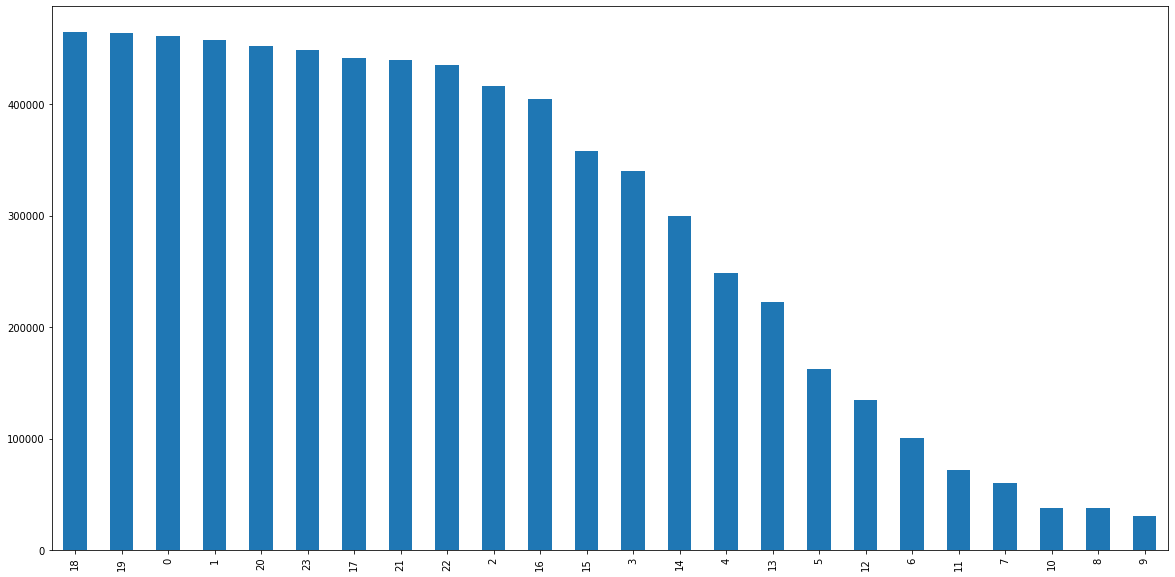

In [ ]:
review['hour'].value_counts().plot(kind = 'bar', figsize=(20,10))

In [ ]:
review.duplicated().sum()

0

In [ ]:
review.isna().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
all_votes      0
day            0
hour           0
dtype: int64

## SENTIMENT ANALYSIS

Here we count for positive vs negative sentiment on reviews, by each business, and loaded to a CSV

In [2]:
import databricks.koalas as ks

In [3]:
review = ks.read_json("./data/review.json", lines=True)

In [4]:
review = review[['review_id', 'business_id']]

In [5]:
df1 = ks.read_csv("./data/sentiment/dataset_1.csv")
df2 = ks.read_csv("./data/sentiment/dataset_2.csv")
df3 = ks.read_csv("./data/sentiment/dataset_3.csv")
df4 = ks.read_csv("./data/sentiment/dataset_4.csv")
df5 = ks.read_csv("./data/sentiment/dataset_5.csv")
df6 = ks.read_csv("./data/sentiment/dataset_6.csv")
df7 = ks.read_csv("./data/sentiment/dataset_7.csv")

In [40]:
sentiment = ks.concat([df1, df2, df3, df4, df5, df6, df7])

In [41]:
sentiment.describe()

,_c0,scores
count,6.990280e+06,6.990280e+06
mean,4.999305e+03,9.886493e-01
std,2.886858e+03,5.183984e-02
min,0.000000e+00,5.000011e-01
25%,2.500000e+03,9.990364e-01
50%,4.999000e+03,9.998349e-01
75%,7.499000e+03,9.999001e-01
max,9.999000e+03,9.999415e-01


In [7]:
sentiment.shape

(6990280, 4)

In [39]:
sentiment.tail()

,review_id,labels
990275,H0RIamZu0B0Ei0P4aeh3sQ,LABEL_1
990276,shTPgbgdwTHSuU67mGCmZQ,LABEL_1
990277,YNfNhgZlaaCO5Q_YJR4rEw,LABEL_1
990278,i-I4ZOhoX70Nw5H0FwrQUA,LABEL_1
990279,RwcKOdEuLRHNJe4M9-qpqg,LABEL_0


In [8]:
sentiment = sentiment.drop(['_c0', 'scores'], axis=1)

In [35]:
review.columns

Index(['review_id', 'business_id'], dtype='object')

In [36]:
sentiment.columns

Index(['review_id', 'labels'], dtype='object')

In [20]:
full_sentiment = review.merge(sentiment, on='review_id', how='left')

In [21]:
full_sentiment.shape

(6990280, 3)

In [22]:
full_sentiment.head()

,review_id,business_id,labels
0,---4VcQZzy_vIIifUDqxsg,X-dPdw1PluJnT-fpiWrfKw,LABEL_0
1,---zIHlP_-j4uR_i6DVZgA,a1lImbWQDu4bcqLgwKCnQw,LABEL_0
2,--0EbOIsbet_ef-5Rd2skw,1Gm0k-SzLB-jTZxVxuvcOg,LABEL_1
3,--0SsSyXoPu5pbITtoR6wg,ZoHPpEtfPlR6dwCe9RF4wg,LABEL_1
4,--0r1VS8Y4Sxj6KvOjm1mQ,9ULVQhqw1ZwQxkKJwxaCVA,LABEL_1


In [23]:
full_sentiment.to_csv('./data/sentiment/full_sentiment.csv', index=False)

In [12]:
sentiment_neg = sentiment.loc[sentiment['labels'] == 'LABEL_0',:]

In [13]:
sentiment_pos = sentiment.loc[sentiment['labels'] == 'LABEL_1',:]

In [14]:
sentiment_neg.shape

(2131297, 2)

In [15]:
sentiment_pos.shape

(4858983, 2)

In [17]:
sentiment_pos.columns

Index(['review_id', 'labels'], dtype='object')

In [18]:
review.columns

Index(['review_id', 'business_id'], dtype='object')

In [28]:
# Join Query without Checkin
neg_sent= ks.sql('''select r.business_id, 
COUNT(s.labels) as neg_reviews

from {sentiment} s 

join {review} r

on s.review_id = r.review_id  

where s.labels = 'LABEL_0'

group by r.business_id

'''
)

In [30]:
# Join Query without Checkin
pos_sent= ks.sql('''select r.business_id, 
COUNT(s.labels) as pos_reviews

from {sentiment} s 

join {review} r

on s.review_id = r.review_id  

where s.labels = 'LABEL_1'

group by r.business_id

'''
)

In [31]:
pos_sent.head()

,business_id,pos_reviews
0,wX-1pDB-eUnlMmv1EI2MPA,28
1,BJOGo_upuBElDT_xOaurIA,414
2,qkp_q3Evjy0x3pBuU_jK1w,62
3,aeuDPfYSDHENrNkPdbWFqw,11
4,Yn6oUj778ETC5kYs7IPH0g,86


In [32]:
full_sentiment = neg_sent.merge(pos_sent, on='business_id', how='full')

/usr/local/lib/python3.9/dist-packages/databricks/koalas/utils.py:736: UserWarning: Warning: While Koalas will accept 'full', you should use 'outer' instead to be compatible with the pandas merge API
  warnings.warn(


In [33]:
full_sentiment.head(20)

,business_id,neg_reviews,pos_reviews
0,---kPU91CF4Lq2-WlRu9Lw,4.0,20
1,--LC8cIrALInl2vyo701tg,NaN,8
2,--epgcb7xHGuJ-4PUeSLAw,22.0,16
3,--gJkxbsiSIwsQKbiwm_Ng,NaN,6
4,--hF_3v1JmU9nlu4zfXJ8Q,NaN,15
5,--qLiYw2ErSmvVwumb2kdw,NaN,5
6,-02xFuruu85XmDn2xiynJw,9.0,112
7,-0EdehHjIQc0DtYU8QcAig,14.0,22
8,-0YvX6VK5S0u_hbQFYq10g,1.0,9
9,-0dKgi_Hpcis921nOpM85Q,2.0,26


In [34]:
full_sentiment.shape

(150346, 3)

In [35]:
full_sentiment['neg_reviews'].fillna(0, inplace=True)
full_sentiment['pos_reviews'].fillna(0, inplace=True)

In [36]:
full_sentiment.head(20)

,business_id,neg_reviews,pos_reviews
0,---kPU91CF4Lq2-WlRu9Lw,4,20
1,--LC8cIrALInl2vyo701tg,0,8
2,--epgcb7xHGuJ-4PUeSLAw,22,16
3,--gJkxbsiSIwsQKbiwm_Ng,0,6
4,--hF_3v1JmU9nlu4zfXJ8Q,0,15
5,--qLiYw2ErSmvVwumb2kdw,0,5
6,-02xFuruu85XmDn2xiynJw,9,112
7,-0EdehHjIQc0DtYU8QcAig,14,22
8,-0YvX6VK5S0u_hbQFYq10g,1,9
9,-0dKgi_Hpcis921nOpM85Q,2,26


In [37]:
full_sentiment.to_csv('./data/sentiment/sentiment_ok.csv', index=False)

In [38]:
full_sentiment_pandas = full_sentiment.to_pandas()
full_sentiment_pandas.to_csv('./data/sentiment/sentiment_ok_unique.csv', index=False)